In [65]:
import pandas as pd
import numpy as np

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data3 = pd.read_csv('../data/data_3.csv')

In [67]:
data31 = data3[['sugar to flour ratio', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake temp',
        'weight', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'manufacture']]

In [7]:
X = data31.iloc[:,:-1]
y = data31.iloc[:,-1:]

In [8]:
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
print(X_train.shape,X_test.shape)

(3630, 17) (1557, 17)


In [69]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [70]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

In [71]:
model.add(Dense(18, activation='relu', input_shape=(17,)))

In [72]:
# Add one hidden layer 
model.add(Dense(8, activation='relu'))

In [73]:
# Add one hidden layer 
model.add(Dense(8, activation='relu'))

In [74]:
# Add one hidden layer 
model.add(Dense(8, activation='relu'))

In [75]:
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [76]:
# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 18)                324       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 152       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.2665628 , -0.39935088, -0.27405384, -0.22172697, -0.3986284 ,
         -0.00772798,  0.02311957, -0.39010766,  0.13833717, -0.28795534,
          0.27168706,  0.0257754 ,  0.34461018, -0.2423377 ,  0.05311134,
          0.26171413,  0.03475812, -0.05654398],
        [ 0.19372627, -0.20903592, -0.1232129 , -0.06116095,  0.37260535,
         -0.22248402, -0.2736193 ,  0.08265093,  0.3860486 , -0.21327907,
          0.30950245, -0.24345921, -0.16815294,  0.2169005 , -0.10695645,
         -0.32892755, -0.36641297, -0.03893328],
        [-0.15738338, -0.33902517, -0.2333909 ,  0.2498863 ,  0.15823624,
         -0.3587606 ,  0.36972752, -0.07903147, -0.02410337, -0.36512533,
          0.13372895, -0.13767883, -0.11799571, -0.13688853, -0.0580616 ,
         -0.24611858,  0.16222325,  0.19507512],
        [-0.33110482,  0.0601576 ,  0.14269343,  0.34185234,  0.04562396,
         -0.2112714 , -0.00314   ,  0.39716706, -0.3289315 ,  0.37546745,
         -0.07579589,  0.1023517 ,  0.3

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [78]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)

#One epoch is when an entire dataset is passed both forward and backward through the neural network only once

Epoch 1/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.4560 - accuracy: 0.7760
Epoch 2/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.4103 - accuracy: 0.8036: 0s - loss: 0.4124 - accu
Epoch 3/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.3979 - accuracy: 0.8105
Epoch 4/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.3880 - accuracy: 0.8143
Epoch 5/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.3831 - accuracy: 0.8176
Epoch 6/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.3790 - accuracy: 0.8193
Epoch 7/50
3630/3630 [==============================] - 8s 2ms/step - loss: 0.3732 - accuracy: 0.8198
Epoch 8/50
3630/3630 [==============================] - 10s 3ms/step - loss: 0.3718 - accuracy: 0.8234
Epoch 9/50
3630/3630 [==============================] - 10s 3ms/step - loss: 0.3670 - accuracy: 0.8264
Epoch 10/50
3630/3630 [==============================]

In [79]:
y_pred = model.predict(X_test)

In [80]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

1557/1557 [==============================] - 0s 42us/step
[0.40467536449432373, 0.8053950071334839]


In [81]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test,y_pred.round())

array([[591, 180],
       [123, 663]])

In [82]:
precision_score(y_test, y_pred.round())

0.7864768683274022

In [83]:
recall_score(y_test, y_pred.round())

0.8435114503816794

In [84]:
f1_score(y_test,y_pred.round())

0.8139963167587477

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [86]:
roc_auc_score(y_test, y_pred)

0.8969119117632499

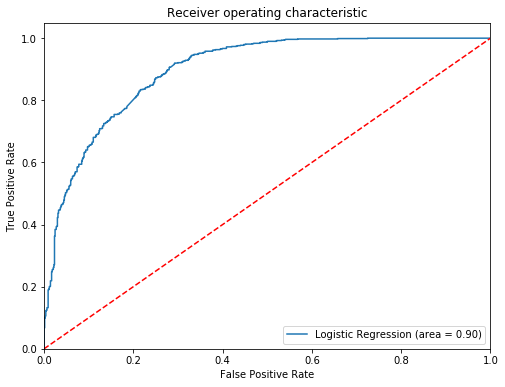

In [87]:

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_AgeBins_ROC')
plt.show()